# Project:commercial agencies 

## by Omar Alomeari

## Table of Contents
- [Introduction](#intro)
- [Wrangling ](#Wrangling )
- [Data cleaning](#Data_cleaning)
- [Analyzing and Visualizing Data](#Analyzing)


<a id='intro'></a>
## Introduction

The project will focus on the non-Saudi agencies that were registered in 2020, compare it to 2019 and answer some questions.


In [1]:
#Import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from bidi.algorithm import get_display

%matplotlib inline 

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
#Reading files
commercial_agencies_19=pd.read_csv("commercial-agencies-2019.csv")
commercial_agencies_20=pd.read_csv("commercial-agencies-2020.csv")

In [4]:
#Checking the first few lines
commercial_agencies_19.head()

,RequestID,RequestDate,Status,City,Principal_Name_Ar,Principal_Name_En,Nationality
0,45192,1/2/2019,قائمة,الدمام,أس كي أف يوروتريد ايه بي,SKF EUROTADE AB,سويديه
1,45193,1/2/2019,قائمة,الدمام,مطعم استاد الشاورما,NaN,المملكة العربية السعودية
2,45194,1/2/2019,قائمة,الدمام,ماستر تك,MASTER TECH,اماراتي
3,45195,1/2/2019,قائمة,الرياض,شركة لو بيتيت فيلز دو أل يوشوبارد و سي أس ايه,Le Petit-fils de L.U Chopard & CIE S.A,سويسري
4,45196,1/3/2019,قائمة,الرياض,ميدنسي اس ار ال,Medency Srl,ايطالي


In [5]:
#Checking the first few lines
commercial_agencies_20.head()

,agency name in arabic,agency name in english,agency nationality,city,agency type,agency status,activity
0,قوام اس ار ال,QUAM SRL,ايطالي,الدمام,وكالة تجارية,قائمة,\r\nمنتجات الموكل من صمامات مختلفة الاحجام وا...
1,بايكون اس دي ان - بي اتش دي,BAICON SDN . NHD,ماليزي,الدمام,وكالة توزيع,قائمة,( منتجات الموكل من الادوية الصيدلانية ( أنسولي...
2,سكن جام للتجارة العامه,SKIN JAM GENERAL TRADING,اماراتي,الدمام,وكالة امتياز,قائمة,"(فتح وتشغيل محلات لبيع الآيس كريم, القهوة, الش..."
3,\tإبيجين لابس اف زد ال ال سي,EPYGEN LABS FZ -LLC,اماراتي,الدمام,وكالة تجارية,قائمة,(منتجات الموكل من الأنزيمات الكيميائية الخاصة ...
4,كازادور تكستيل سان. في إي. تي أي سي. ايه إس،,CAZADOR TEKSTIL SAN VE TIC AS,تركي,الدمام,وكالة تجارية,قائمة,(منتجات الموكل من المنسوجات والملابس والاحذية ...


Columns names in both data are different and not efficient, some of them unnecessary. The 2020 data need a date column.

<a id='Wrangling'></a>
## Wrangling 

### Assessing data 

In [6]:
#Checking number for columns and row, data type and null  
commercial_agencies_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653 entries, 0 to 652
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   RequestID          653 non-null    int64 
 1   RequestDate        653 non-null    object
 2   Status             653 non-null    object
 3   City               653 non-null    object
 4   Principal_Name_Ar  653 non-null    object
 5   Principal_Name_En  590 non-null    object
 6   Nationality        653 non-null    object
dtypes: int64(1), object(6)
memory usage: 35.8+ KB


The data contains 7 columns and 653 rows. The date datatype is wrong, principal name_en has missing values.

In [7]:
#Checking number for columns and row, data type and null  
commercial_agencies_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   agency name in arabic   504 non-null    object
 1   agency name in english  501 non-null    object
 2   agency nationality      526 non-null    object
 3   city                    526 non-null    object
 4   agency type             526 non-null    object
 5   agency status           526 non-null    object
 6   activity                526 non-null    object
dtypes: object(7)
memory usage: 28.9+ KB


The data contains 7 columns and 526 rows. Both agency name columns have missing values.

In [8]:
#Checking missing values for 2019 dataset
commercial_agencies_19[commercial_agencies_19.isna().any(axis=1)]

,RequestID,RequestDate,Status,City,Principal_Name_Ar,Principal_Name_En,Nationality
1,45193,1/2/2019,قائمة,الدمام,مطعم استاد الشاورما,NaN,المملكة العربية السعودية
11,45203,1/9/2019,قائمة,الرياض,شركة فطيرة الفلافل للمطاعم المحدودة,NaN,المملكة العربية السعودية
20,45212,1/15/2019,قائمة,الرياض,شركة مصنع الراي للصناعات الدوائية,NaN,المملكة العربية السعودية
25,45217,1/17/2019,قائمة,الرياض,مؤسسة شلال الحلى لتقديم الوجبات,NaN,المملكة العربية السعودية
44,45236,1/28/2019,قائمة,الدمام,شركة الكنفاني الأصلي للكنافة,NaN,المملكة العربية السعودية
50,45242,1/31/2019,قائمة,الرياض,شركة الامجاد للتجارة والصناعة,NaN,المملكة العربية السعودية
70,45262,2/14/2019,قائمة,الرياض,فرع شركة تريند مايكرو ليمتد,NaN,المملكة العربية السعودية
84,45276,2/20/2019,قائمة,الدمام,شركة نابورس العربية المحدودة,NaN,المملكة العربية السعودية
117,45309,3/13/2019,قائمة,الدمام,شركة قطوف وحلا التجارية,NaN,المملكة العربية السعودية
120,45312,3/14/2019,قائمة,الرياض,شركة مشاريع التدفئه والتبريد مصنع النجمه الذهب...,NaN,المملكة العربية السعودية


In [9]:
#Checking missing values for 2020 dataset
commercial_agencies_20[commercial_agencies_20.isna().any(axis=1)]

,agency name in arabic,agency name in english,agency nationality,city,agency type,agency status,activity
5,NaN,NaN,المملكة العربية السعودية,الدمام,وكالة توزيع,قائمة,ابواب خشبية- ديكورات خشبية- مغاسل خشبية-خزائن-...
31,NaN,NaN,المملكة العربية السعودية,الدمام,وكالة امتياز,قائمة,فتح وتشغيل سلسلة مطاعم لتقديم الوجبات والمشروب...
32,NaN,NaN,المملكة العربية السعودية,الدمام,وكالة امتياز,قائمة,فتح وتشغيل سلسلة من المحلات لتقديم الوجبات الخ...
137,الشركة الاوربية المصرية للصناعات الدوائية,NaN,مصري,الرياض,وكالة توزيع,قائمة,توزيع منجات الموكل من الادوية والمستحضرات الطبية
138,شركة سوليديريتي السعودية للتكافل,NaN,المملكة العربية السعودية,الرياض,وكالة تجارية,قائمة,خدمات الموكل من التأمين \r\n\r\n
142,NaN,NaN,المملكة العربية السعودية,الرياض,وكالة توزيع,قائمة,خدمات الموكل من برامج وحلول الحماية من الفيروس...
146,NaN,NaN,المملكة العربية السعودية,الرياض,وكالة تجارية,قائمة,خدمات ومنتجات الموكل من العناية بسيارات والتضل...
149,NaN,NaN,المملكة العربية السعودية,الرياض,وكالة امتياز,قائمة,فتح و تشغيل مركز لبرامج التعليم الترفيه الخاصة...
159,NaN,NaN,المملكة العربية السعودية,الرياض,وكالة امتياز,قائمة,فتح وتشغيل المطاعم تحت العلامة التجارية فطيرة ...
162,NaN,NaN,المملكة العربية السعودية,الرياض,وكالة امتياز,قائمة,فتح وتشغيل سلسلة مطاعم لبيع الوجبات السريعة وا...


Almost all missing values are Saudi agency except for three-row.

In [10]:
#Checking for duplicates 
sum(commercial_agencies_19.duplicated())

0

In [11]:
#Checking for duplicates
sum(commercial_agencies_20.duplicated())

0

In [12]:
#Checking for nonactive agency
commercial_agencies_19.Status.value_counts()

قائمة     652
مشطوبة      1
Name: Status, dtype: int64

In [13]:
#Checking for nonactive agency
commercial_agencies_20['agency status'].value_counts()

قائمة    526
Name: agency status, dtype: int64

In [14]:
#Getting index for nonactive agency
commercial_agencies_19[commercial_agencies_19.Status=='مشطوبة']

,RequestID,RequestDate,Status,City,Principal_Name_Ar,Principal_Name_En,Nationality
127,45319,3/18/2019,مشطوبة,الرياض,شركة دونجوان هيلي اليكترونيكس كو.،ليمتد,"Dongguan Hele Electronics Co., Ltd",الصين الشعبيه


No duplicate was found in both data.
There is a non-active agency in 2019 data.

In [15]:
#Checking nationality 
commercial_agencies_19.Nationality.value_counts()

المملكة العربية السعودية    70
الصين الشعبيه               67
امريكي                      63
بريطاني                     40
الماني                      37
ايطالي                      36
اماراتي                     36
سويسري                      25
هندي                        25
كوريه الجنوبيه              21
تركي                        21
فرنسي                       20
مصري                        18
هولندي                      16
اسباني                      16
اردني                       12
بلجيكي                      11
كويتي                        9
ماليزي                       8
ايرلندي                      7
نرويجيه                      7
سويديه                       6
دنمركيه                      5
يونانيه                      5
بولندي                       4
استرالي                      4
ياباني                       4
برازيلي                      4
سنغافوريه                    4
صينيه وطنيه - تايوان         4
لبناني                       4
تشيكي                        3
نمساوي  

In [16]:
#Checking nationality 
commercial_agencies_20["agency nationality"].value_counts()

امريكي                      55
الماني                      41
الصين الشعبيه               37
المملكة العربية السعودية    35
ايطالي                      34
بريطاني                     32
اماراتي                     27
كوريه الجنوبيه              21
اسباني                      19
هندي                        19
تركي                        18
فرنسي                       16
هولندي                      16
سويسري                      15
مصري                         9
اردني                        8
ايرلندي                      8
دنمركيه                      7
فنلنديه                      6
برازيلي                      6
بلجيكي                       6
ياباني                       5
بحريني                       5
كويتي                        5
سنغافوريه                    5
سويديه                       5
نمساوي                       5
قبرصيه                       5
فيتناميه                     4
بولندي                       3
استرالي                      3
روسيه                        3
ارجنتيني

In [17]:
#Checking agency types
commercial_agencies_20['agency type'].value_counts()

وكالة توزيع        357
وكالة تجارية       106
وكالة امتياز        41
وكالة خدمات         21
وكالة عقد داخلي      1
Name: agency type, dtype: int64

### Quality issues
- Suadi Arabia rows 
- Erroneous Datatypes(RequestDate 2019 table)
- Missing values
- Lowercase names are given in praincipal_name_en
- Non-active agency
- Missing names (row 137 in 2020 table, 407 and 342 in 2019 table) 

### Tidiness issues
- Not practical columns names
- 2020 table should have a date column
- Unnecessary columns(RequestId, principal_name_ar , agency name arabicand activity)

<a id='Data_cleaning'></a>
## Data cleaning 

In [18]:
#Making a copy for both data
comm_agencies_19_clean=commercial_agencies_19.copy()
comm_agencies_20_clean=commercial_agencies_20.copy()

### Missing data 

In [19]:
#Dropping Saudi Arabia rows 
comm_agencies_19_clean=comm_agencies_19_clean[comm_agencies_19_clean.Nationality!='المملكة العربية السعودية']
comm_agencies_20_clean=comm_agencies_20_clean[comm_agencies_20_clean['agency nationality']!='المملكة العربية السعودية']

In [20]:
#Writing the missing agency names   
comm_agencies_19_clean.Principal_Name_En[407]="Mujezat Al-Shifa Company"

comm_agencies_19_clean.Principal_Name_En[342]="Middle East Veterinary Vaccines"

comm_agencies_20_clean["agency name in english"][137]="European Egyptian Pharmaceutical Industry"

<ipython-input-20-f420b168b27b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comm_agencies_19_clean.Principal_Name_En[342]="Middle East Veterinary Vaccines"


In [21]:
#Checking for nulls
comm_agencies_19_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 652
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   RequestID          583 non-null    int64 
 1   RequestDate        583 non-null    object
 2   Status             583 non-null    object
 3   City               583 non-null    object
 4   Principal_Name_Ar  583 non-null    object
 5   Principal_Name_En  583 non-null    object
 6   Nationality        583 non-null    object
dtypes: int64(1), object(6)
memory usage: 56.4+ KB


In [22]:
#Checking for nulls
comm_agencies_20_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 0 to 525
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   agency name in arabic   491 non-null    object
 1   agency name in english  491 non-null    object
 2   agency nationality      491 non-null    object
 3   city                    491 non-null    object
 4   agency type             491 non-null    object
 5   agency status           491 non-null    object
 6   activity                491 non-null    object
dtypes: object(7)
memory usage: 50.7+ KB


In [23]:
#Checking for saudi arabia rows
comm_agencies_19_clean[comm_agencies_19_clean['Nationality']=='المملكة العربية السعودية']

,RequestID,RequestDate,Status,City,Principal_Name_Ar,Principal_Name_En,Nationality


In [24]:
#Checking for saudi arabia rows
comm_agencies_20_clean[comm_agencies_20_clean['agency nationality']=='المملكة العربية السعودية']

,agency name in arabic,agency name in english,agency nationality,city,agency type,agency status,activity


### Tidiness

In [25]:
#Rename columns 
comm_agencies_20_clean.rename(columns={"agency name in arabic":"principal_name_Ar",
                                      "agency name in english":"principal_name_En",
                                      "agency nationality":"nationality",
                                      "agency type":"agency_type",
                                      "agency status":"status"},inplace=True)


In [26]:
#Rename columns 
comm_agencies_19_clean.rename(columns={"RequestID":"requestID",
                                      "RequestDate":"date",
                                      "Status":"status",
                                      "City":"city",
                                      "Principal_Name_Ar":"principal_name_Ar",
                                      'Principal_Name_En':'principal_name_En',
                                      "Nationality":'nationality'},inplace=True)

In [27]:
#Create date column
comm_agencies_20_clean['date']='2020'

In [28]:
#Dropping unnecessary columns 
comm_agencies_19_clean.drop(columns=['requestID','principal_name_Ar'],axis=1,inplace=True)
comm_agencies_20_clean.drop(columns=['principal_name_Ar','activity'],axis=1,inplace=True);

In [29]:
#Change the order of columns
comm_agencies_19_clean=comm_agencies_19_clean[['principal_name_En','nationality','city','status','date']]

In [30]:
#Checking if the changes applied
comm_agencies_19_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 0 to 652
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   principal_name_En  583 non-null    object
 1   nationality        583 non-null    object
 2   city               583 non-null    object
 3   status             583 non-null    object
 4   date               583 non-null    object
dtypes: object(5)
memory usage: 27.3+ KB


In [31]:
#Checking if the changes applied 
comm_agencies_20_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 0 to 525
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   principal_name_En  491 non-null    object
 1   nationality        491 non-null    object
 2   city               491 non-null    object
 3   agency_type        491 non-null    object
 4   status             491 non-null    object
 5   date               491 non-null    object
dtypes: object(6)
memory usage: 26.9+ KB


### Quality 

In [32]:
#Dropping non-active agency 
comm_agencies_19_clean.drop(index=127,inplace=True)

In [33]:
#Checking if the code worked
comm_agencies_19_clean.status.value_counts()

قائمة    582
Name: status, dtype: int64

In [34]:
#Change date datatype
comm_agencies_19_clean.date=pd.to_datetime(comm_agencies_19_clean.date).dt.year

In [35]:
#Change date datatype
comm_agencies_20_clean.date=pd.to_datetime(comm_agencies_20_clean.date).dt.year

In [36]:
#Checking if the code work
comm_agencies_19_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 582 entries, 0 to 652
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   principal_name_En  582 non-null    object
 1   nationality        582 non-null    object
 2   city               582 non-null    object
 3   status             582 non-null    object
 4   date               582 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 27.3+ KB


In [37]:
#Checking if the code work
comm_agencies_20_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 0 to 525
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   principal_name_En  491 non-null    object
 1   nationality        491 non-null    object
 2   city               491 non-null    object
 3   agency_type        491 non-null    object
 4   status             491 non-null    object
 5   date               491 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 26.9+ KB


In [38]:
#Capitalize names in 2019 table
comm_agencies_19_clean.principal_name_En=comm_agencies_19_clean.principal_name_En.str.capitalize()

In [39]:
#Capitalize names in 2020 table
comm_agencies_20_clean.principal_name_En=comm_agencies_20_clean.principal_name_En.str.capitalize()

In [40]:
#Checking if the code worked
comm_agencies_19_clean[comm_agencies_19_clean.principal_name_En.str.islower()]

,principal_name_En,nationality,city,status,date


In [41]:
#Checking if the code worked
comm_agencies_20_clean[comm_agencies_20_clean.principal_name_En.str.islower()]

,principal_name_En,nationality,city,agency_type,status,date
11,3x engineering,موناكويه,الدمام,وكالة خدمات,قائمة,2020
96,2m kablo dis ticaret ve pazarlama a.s.,تركي,الدمام,وكالة تجارية,قائمة,2020


In [42]:
#Merge the two table
comm_agen_master=comm_agencies_20_clean.merge(comm_agencies_19_clean,how='outer')

### Storing Data

In [43]:
#Storing
comm_agen_master.to_csv('com_agencies_master',index=False)

<a id='Analyzing'></a>
## Analyzing and Visualizing Data

In [44]:
#Loading the dataset
com_agen=pd.read_csv('com_agencies_master')

In [45]:
#Checking the first few lines
com_agen.head()

,principal_name_En,nationality,city,agency_type,status,date
0,Quam srl,ايطالي,الدمام,وكالة تجارية,قائمة,2020
1,Baicon sdn . nhd,ماليزي,الدمام,وكالة توزيع,قائمة,2020
2,Skin jam general trading,اماراتي,الدمام,وكالة امتياز,قائمة,2020
3,Epygen labs fz -llc,اماراتي,الدمام,وكالة تجارية,قائمة,2020
4,Cazador tekstil san ve tic as,تركي,الدمام,وكالة تجارية,قائمة,2020


#### Is there an increase of number agencies in cities? 

In [46]:
#Create a function to display Arabic words correctly
def display_arabic(word):
    return {get_display(arabic_reshaper.reshape(i)): i for i in word}

In [47]:
#Reshape cities to display it correctly 
cities=display_arabic(com_agen.city)

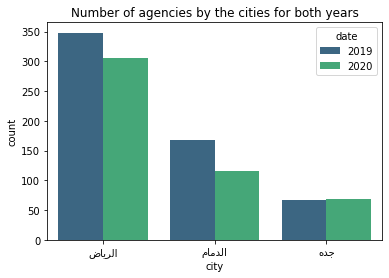

In [48]:
#Plot number of cities by date
sns.countplot('city',hue='date',data=com_agen,order=com_agen.city.value_counts().index,palette='viridis')

#Replace labels to display them correctly 
plt.xticks([1,0,2],labels=cities);

plt.title('Number of agencies by the cities for both years');

Agencies number in  Riyadh and Dammam has been decreasing, but for Jeddah is the same. Overall, the number of agencies in 2020 is less than the previous year.

#### What are the top 10 nationalities for both years?

In [49]:
#filter by 2019 agencies 
com_agen_19=com_agen[com_agen.date==2019]

#Reshape nationalities to display it correctly for 2019
nationality19=display_arabic(com_agen_19.nationality.value_counts().index)

#Filter by 2020 agencies 
com_agen_20=com_agen[com_agen.date==2020]

#Reshape nationalities to display it correctly for 2020
nationality20=display_arabic(com_agen_20.nationality.value_counts().index)

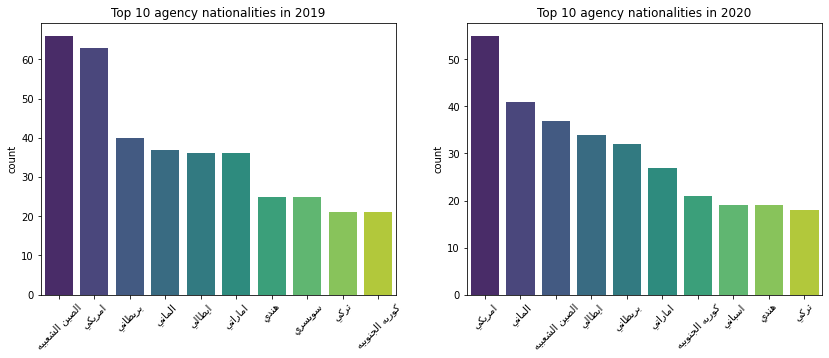

In [50]:
plt.figure(figsize=[14,5])

#Plot top nationalities in 2019
plt.subplot(1,2,1)

sns.countplot('nationality',data=com_agen_19,order=com_agen_19.nationality.value_counts().iloc[:10].index
             ,palette='viridis')
#Replace labels with the correct names
plt.xticks([i for i in range(10)],nationality19,rotation=45)
plt.xlabel("")
plt.title('Top 10 agency nationalities in 2019');

#Plot top nationalities in 2020
plt.subplot(1,2,2)

sns.countplot('nationality',data=com_agen_20,order=com_agen_20.nationality.value_counts().iloc[:10].index
             ,palette='viridis')
plt.xticks([i for i in range(10)],nationality20,rotation=45)
plt.title('Top 10 agency nationalities in 2020');
plt.xlabel("");

The agencies for both years are almost the same but have different ranks.
Chinese agencies are top for 2019 but it decreases in 2020 to third place, and American and German agencies are increasing, for British, Switzer, Indian, and  Korean they decrease, Emiratis and Turkish are the same ranks.

#### What are the cities top nationalities prefer?

In [51]:
def create_stacked_plot(data,column1,column2):
    """ Function create stacked bar chart """
    
    #List of first category 
    categories1_order=list(data[column1].value_counts().iloc[:10].index)
    #List of second category
    categories2_order=list(data[column2].value_counts().index)
    #List of base heights
    baselines=np.zeros(len(categories1_order))
    #choose color palette
    base_c=sns.color_palette('viridis',n_colors=len(categories2_order))
    # for storing references to plot elements
    agency=[]
    
    
    for i in range(len(categories2_order)):
        # isolate the counts of the first category
        cate=categories2_order[i]
        inner_counts=data[data[column2] == cate][column1].value_counts()
        # then plot those counts on top of the accumulated baseline
        bars=plt.bar(x= np.arange(len(categories1_order)),height=inner_counts.reindex(categories1_order),
                             bottom=baselines, color=base_c[i])
        agency.append(bars)
        baselines += inner_counts.reindex(categories1_order)
        
    categories1_arabic=display_arabic(categories1_order)
    plt.xticks(np.arange(len(categories1_order)),categories1_arabic,rotation=45)
    
    categories2_legend=display_arabic(categories2_order)
    plt.legend(reversed(agency),reversed(categories2_legend))

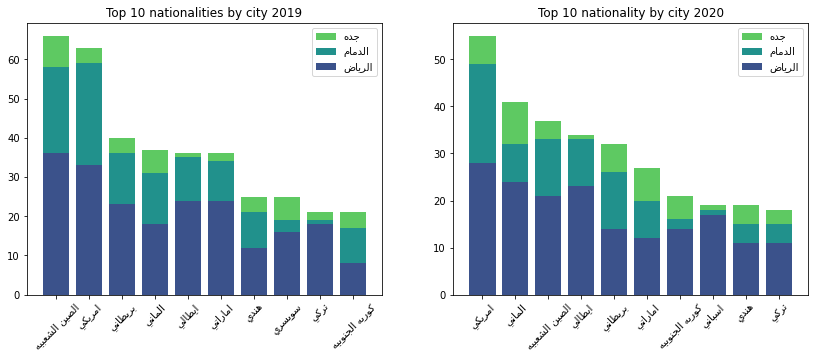

In [52]:
plt.figure(figsize=[14,5])

plt.subplot(1,2,1)
#plot 2019 nationalities by city
create_stacked_plot(com_agen_19,'nationality','city')
plt.title("Top 10 nationalities by city 2019");

#plot 2020 nationalities by city
plt.subplot(1,2,2)
create_stacked_plot(com_agen_20,'nationality','city')
plt.title("Top 10 nationality by city 2020");

For both years,  agencies prefer Riyadh as the first choice and Dammam as the second.

#### what are agency types for 2020 nationalities?

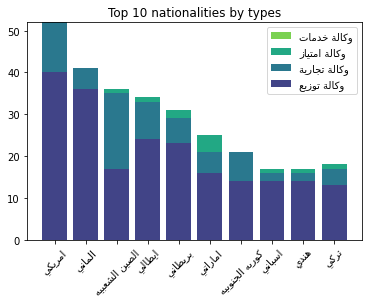

In [53]:
#Plot nationalities by types
create_stacked_plot(com_agen_20,'nationality','agency_type')
plt.title('Top 10 nationalities by types');

The distribution type is the most common one, followed by a commercial type, and the less two are franchise and service types.

#### Where do most agency types locate? 

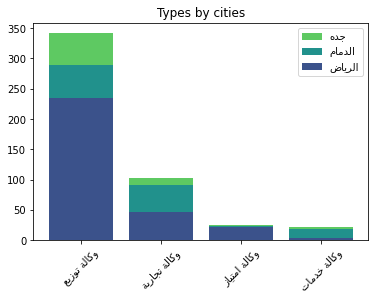

In [54]:
#Plot agecny by cities
create_stacked_plot(com_agen_20,'agency_type','city')
plt.title("Types by cities");

Most distribution agencies are in Riyadh and evenly in Dammam and Jeddah, for commercial agencies are equally in Riyadh and Dammam and less in Jeddah, franchise mostly in Riyadh, and for service agencies are in Dammam.

### Conclusion 

Many things happened in 2020 that led to decreased number of agencies, but that doesn’t hide the fact both has almost the same agencies but different rank, almost all of those are distribution agencies and prefer Riyadh and Dammam.